# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

api_key = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# set up lists to hold reponse info
found_cities = []
temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
i = 0

# Loop through the list of cities and perform a request for data on each 
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    try:
        found_cities.append(response['name'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        i = i + 1
        print(f"Calm down, friend. I've processed request {i} for {city}")
    except NameError:
        print(f"Oops - I can't find data on {city}, I'll have to skip it")
        pass
    except KeyError:
        print(f"Oops - I can't find data on {city}, I'll have to skip it")
        pass

Calm down, friend. I've processed request 1 for mount gambier
Calm down, friend. I've processed request 2 for puerto ayora
Oops - I can't find data on barentsburg, I'll have to skip it
Calm down, friend. I've processed request 3 for arraial do cabo
Calm down, friend. I've processed request 4 for beringovskiy
Calm down, friend. I've processed request 5 for kapaa
Calm down, friend. I've processed request 6 for avarua
Calm down, friend. I've processed request 7 for busselton
Calm down, friend. I've processed request 8 for yarmouth
Calm down, friend. I've processed request 9 for vaini
Calm down, friend. I've processed request 10 for pevek
Calm down, friend. I've processed request 11 for omboue
Calm down, friend. I've processed request 12 for turkistan
Calm down, friend. I've processed request 13 for yellowknife
Calm down, friend. I've processed request 14 for codrington
Calm down, friend. I've processed request 15 for san jeronimo
Calm down, friend. I've processed request 16 for rikitea
Ca

Calm down, friend. I've processed request 129 for nikolskoye
Calm down, friend. I've processed request 130 for constitucion
Calm down, friend. I've processed request 131 for bengkulu
Calm down, friend. I've processed request 132 for lasa
Calm down, friend. I've processed request 133 for cidreira
Calm down, friend. I've processed request 134 for pitimbu
Oops - I can't find data on attawapiskat, I'll have to skip it
Oops - I can't find data on labutta, I'll have to skip it
Calm down, friend. I've processed request 135 for castro
Calm down, friend. I've processed request 136 for zhigansk
Calm down, friend. I've processed request 137 for sasykoli
Calm down, friend. I've processed request 138 for cabinda
Calm down, friend. I've processed request 139 for san cristobal
Oops - I can't find data on mutsamudu, I'll have to skip it
Calm down, friend. I've processed request 140 for votkinsk
Calm down, friend. I've processed request 141 for hovd
Calm down, friend. I've processed request 142 for sao

Oops - I can't find data on kadykchan, I'll have to skip it
Calm down, friend. I've processed request 255 for channel-port aux basques
Oops - I can't find data on nizhneyansk, I'll have to skip it
Calm down, friend. I've processed request 256 for dzerzhinskoye
Calm down, friend. I've processed request 257 for turbat
Calm down, friend. I've processed request 258 for nyurba
Calm down, friend. I've processed request 259 for soria
Calm down, friend. I've processed request 260 for cartagena
Calm down, friend. I've processed request 261 for praia da vitoria
Calm down, friend. I've processed request 262 for bonfim
Oops - I can't find data on toliary, I'll have to skip it
Calm down, friend. I've processed request 263 for nieuw amsterdam
Calm down, friend. I've processed request 264 for svetlyy
Calm down, friend. I've processed request 265 for pimenta bueno
Calm down, friend. I've processed request 266 for acapulco
Calm down, friend. I've processed request 267 for baykit
Calm down, friend. I've

Calm down, friend. I've processed request 383 for sao jose da coroa grande
Calm down, friend. I've processed request 384 for anqing
Calm down, friend. I've processed request 385 for touros
Calm down, friend. I've processed request 386 for lebu
Calm down, friend. I've processed request 387 for vyartsilya
Calm down, friend. I've processed request 388 for husavik
Calm down, friend. I've processed request 389 for leh
Calm down, friend. I've processed request 390 for kruisfontein
Calm down, friend. I've processed request 391 for angoram
Calm down, friend. I've processed request 392 for pisco
Calm down, friend. I've processed request 393 for cayenne
Calm down, friend. I've processed request 394 for winnemucca
Calm down, friend. I've processed request 395 for ola
Calm down, friend. I've processed request 396 for borba
Oops - I can't find data on sunamganj, I'll have to skip it
Calm down, friend. I've processed request 397 for medvezhyegorsk
Calm down, friend. I've processed request 398 for ta

Calm down, friend. I've processed request 515 for havelock
Oops - I can't find data on mergui, I'll have to skip it
Calm down, friend. I've processed request 516 for mul
Calm down, friend. I've processed request 517 for souillac
Calm down, friend. I've processed request 518 for ukiah
Calm down, friend. I've processed request 519 for timra
Calm down, friend. I've processed request 520 for bilma
Oops - I can't find data on pilos, I'll have to skip it
Calm down, friend. I've processed request 521 for ostrovnoy
Calm down, friend. I've processed request 522 for atar
Calm down, friend. I've processed request 523 for qaqortoq
Calm down, friend. I've processed request 524 for zhangjiakou
Calm down, friend. I've processed request 525 for airai
Calm down, friend. I've processed request 526 for tinqueux
Calm down, friend. I've processed request 527 for luanda
Calm down, friend. I've processed request 528 for haines junction
Calm down, friend. I've processed request 529 for maua
Calm down, friend.

In [4]:

for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
#     t_temp.append(response['main']['temp'])
#     t_lat.append(response['coord']['lat'])
#     t_lng.append(response['coord']['lon'])
#     t_cities.append(response['name'])
    pprint(response)


{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -37.83, 'lon': 140.77},
 'dt': 1597179478,
 'id': 2156643,
 'main': {'feels_like': 5.07,
          'humidity': 93,
          'pressure': 1005,
          'temp': 10,
          'temp_max': 10,
          'temp_min': 10},
 'name': 'Mount Gambier',
 'sys': {'country': 'AU',
         'id': 9560,
         'sunrise': 1597181129,
         'sunset': 1597219118,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 10, 'speed': 6.7}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -0.74, 'lon': -90.35},
 'dt': 1597179479,
 'id': 3652764,
 'main': {'feels_like': 17.29,
          'humidity': 69,
          'pressure': 1010,
          'temp': 21.85,
          'temp_max': 24,
          'temp_min': 20.56},
 'name': 'Puerto Ayora',


KeyboardInterrupt: 

In [ ]:
print(found_cities)
print(temp)
print(lat)
print(lon)
print(humidity)
print(cloudiness)
print(wind)
print(country)
print(date)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": found_cities,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temperature": temp, 
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind,
    "Country": country, 
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.83,140.77,10.00,93,40,6.70,AU,1597178792
1,Puerto Ayora,-0.74,-90.35,24.00,69,40,9.30,EC,1597178793
2,Arraial do Cabo,-22.97,-42.03,25.00,69,40,4.10,BR,1597178795
3,Beringovskiy,63.05,179.32,12.61,73,0,2.15,RU,1597178796
4,Kapaa,22.08,-159.32,28.89,74,40,5.70,US,1597178797


In [6]:
weather_data.to_csv(r'WeatherPy_Results.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data = weather_data.sort_values("Humidity", ascending = False)
weather_data[['Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,18.635605,18.004181,20.529964,70.380783,49.450178,3.542278
std,33.668399,90.838833,8.083247,19.948441,37.764754,2.438754
min,-54.800000,-179.170000,1.300000,9.000000,0.000000,0.140000
25%,-10.405000,-65.140000,14.000000,60.000000,11.000000,1.607500
50%,22.850000,24.175000,21.595000,74.000000,40.000000,3.100000
75%,46.620000,96.310000,26.670000,85.000000,89.000000,5.030000
max,78.220000,179.320000,40.080000,100.000000,100.000000,12.750000


In [22]:
#  Get the indices of cities that have humidity over 100%.
max_humidity = weather_data.loc[weather_data["Humidity"] > 100, :]
max_humidity


,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

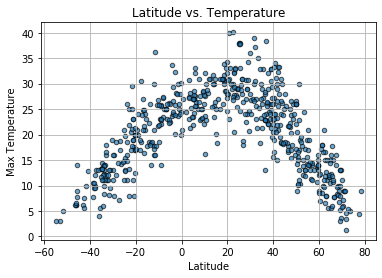

In [8]:
weather_data.plot(kind="scatter", x="Latitude", y="Max Temperature", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Temperature")
plt.show()

## Latitude vs. Humidity Plot

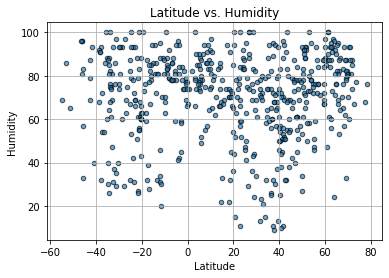

In [9]:
weather_data.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

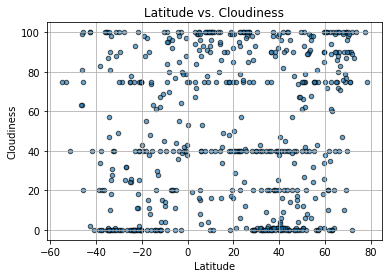

In [10]:
weather_data.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

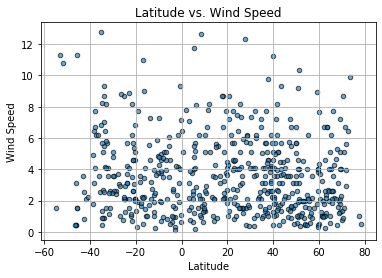

In [11]:
weather_data.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, edgecolor='black', alpha = .65,
              title="Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [45]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_regress(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, regress_values, "r-", color="tomato")    
    plt.annotate(line_eq, (x.max()-1, y.max()-1), fontsize=15,color="firebrick")
    return line_eq

In [64]:
# Create Northern and Southern Hemisphere DataFrames
northern_weather = weather_data.loc[weather_data["Latitude"] > 0, :]
southern_weather = weather_data.loc[weather_data["Latitude"] < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Observations! 
Through these regressions, I have developed the following observations:
1. Temperatures in mapped cities are inversely proportionate to the distance to the equator. When approaching the equator, ascending in latitude in the Southern hemisphere and descending in the Northern hemisphere, temperatures either increase or decrease at a roughly proportionate rate. That being said, it is interesting that cities in the southern hemisphere increase in temperature at a lower rate than cities in the northen hemisphere decrease. 
2. The linear regression of humidity and cloudiness seem not to be impacted dramatically by location - insofar as both Northern and Southern hemispheres experience roughly 70-75% humidity and cloudiness hovers between 40-60 for each.
3. Wind speed is relatively stable at 4-6 MPH between both hemispheres, although it is interesting that the Southern Hemisphere DECREASES in wind speed as it nears the Equator whereas the Northern Hemisphere INCREASES, albeit it's less than 2MPH and doesn't appear to be a statistically relevant amount.
4. Remarkably, one of the more surprising observations I made from this randomly generated list of cities by Longitude and Latitude is the sheer difference in volume of sample size. Of the roughly 560 locations with nearby cities, only 33% or 187 cities were found matching those coordinates. This led me to investigate and find that nearly 90% of the global population lives in the northern hemisphere. The variations in temperature, humidity, cloudiness and wind speed between the two hemispheres are now more clear. 


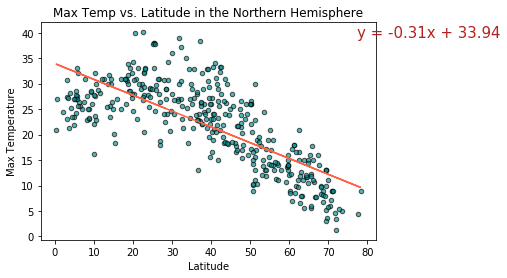

In [55]:
northern_weather.plot(kind="scatter", y="Max Temperature", x="Latitude", color = "darkcyan", edgecolor='black', alpha = .65,
              title="Max Temp vs. Latitude in the Northern Hemisphere")
lin_regress(x = northern_weather["Latitude"], y = northern_weather["Max Temperature"])
plt.savefig('Images/Northern_TempVsLat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

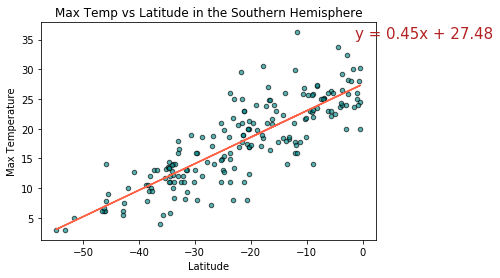

In [56]:
southern_weather.plot(kind= "scatter", x="Latitude", y="Max Temperature", color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Max Temp vs Latitude in the Southern Hemisphere")
lin_regress(x = southern_weather["Latitude"], y = southern_weather["Max Temperature"])
plt.savefig('Images/Southern_TempVsLat.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

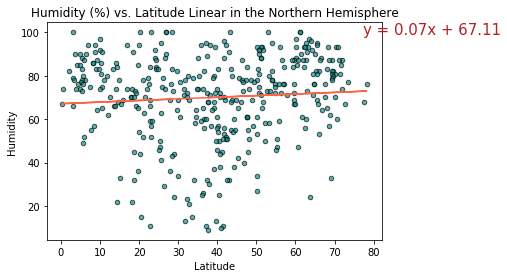

In [57]:
northern_weather.plot(kind='scatter', x = 'Latitude', y= 'Humidity', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Humidity (%) vs. Latitude Linear in the Northern Hemisphere")
lin_regress(x=northern_weather['Latitude'], y=northern_weather['Humidity'])
plt.savefig('Images/Northern_HumidityVsLat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

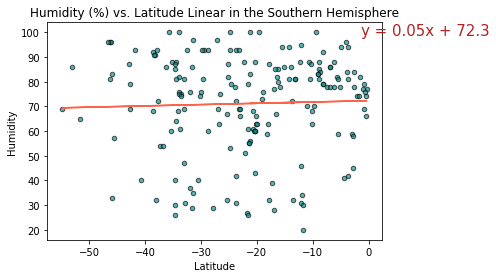

In [58]:
southern_weather.plot(kind='scatter', x = 'Latitude', y= 'Humidity', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Humidity (%) vs. Latitude Linear in the Southern Hemisphere")
lin_regress(x=southern_weather['Latitude'], y=southern_weather['Humidity'])
plt.savefig('Images/Southern_HumidityVsLat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

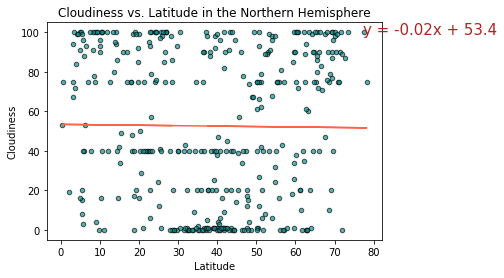

In [69]:
northern_weather.plot(kind='scatter', x = 'Latitude', y= 'Cloudiness', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Cloudiness vs. Latitude in the Northern Hemisphere")
lin_regress(x=northern_weather['Latitude'], y=northern_weather['Cloudiness'])
plt.savefig('Images/Northern_CloudinessVsLat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

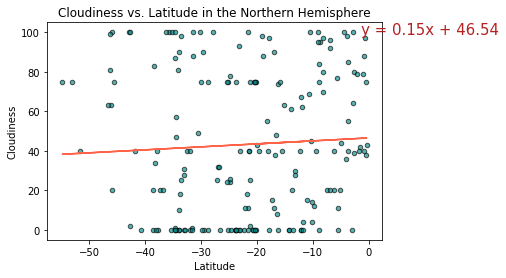

In [70]:
southern_weather.plot(kind='scatter', x = 'Latitude', y= 'Cloudiness', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Cloudiness vs. Latitude in the Northern Hemisphere")
lin_regress(x=southern_weather['Latitude'], y=southern_weather['Cloudiness'])
plt.savefig('Images/Southern_CloudinessVsLat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

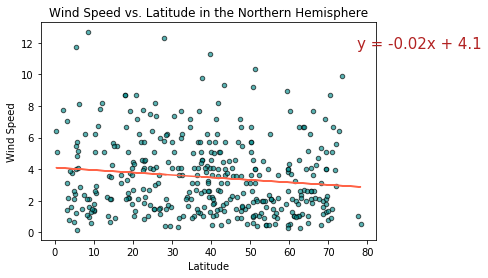

In [71]:
northern_weather.plot(kind="scatter", x='Latitude', y='Wind Speed', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Wind Speed vs. Latitude in the Northern Hemisphere")
lin_regress(x=northern_weather['Latitude'], y=northern_weather['Wind Speed'])
plt.savefig('Images/Northern_WindSpeedVsLat.png')
plt.show()                                               

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

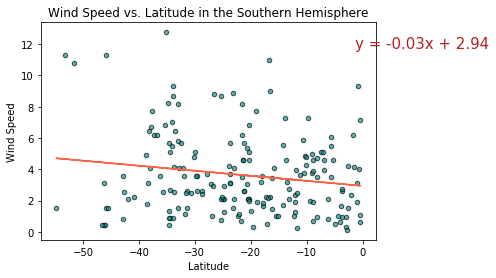

In [72]:
southern_weather.plot(kind="scatter", x='Latitude', y='Wind Speed', color = "darkcyan", edgecolor= "black", alpha = .65, 
                    title= "Wind Speed vs. Latitude in the Southern Hemisphere")
lin_regress(x=southern_weather['Latitude'], y=southern_weather['Wind Speed'])
plt.savefig('Images/Southern_WindSpeedVsLat.png')
plt.show()        